<p align="center">
<img src = "https://github.com/HarryVargas96/Wine-quality/blob/main/logo_uc_grande.png?raw=true" alt = "Encabezado" width = "80%">  </img>

Este taller guiado tiene como objetivo mostrar la implementación de 2 modelos clásicos usando scikitlearn. Lo invito a interactuar y experimentar libremente con esta herramienta de aprendizaje. En el menú superior de click al botón copiar en Drive para crear una copia editable de este Notebook.

En este taller guiado veremos como:

* Entrenar y evaluar un modelo de regresión logistica
* Entrenar y evaluar un modelo de regresión lineal


## **1. Importar librería sklearn**

In [ ]:
!pip install -U scikit-learn

     |████████████████████████████████| 23.1 MB 1.5 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
# El nombre del módulo de Python es sklearn y no scikitlearn
import sklearn

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
!python --version
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('Scikit-learn', sklearn.__version__)

Python 3.7.12
NumPy 1.19.5
Pandas 1.1.5
Matplotlib 3.2.2
Scikit-learn 1.0


Este taller guiado fue creado con las siguientes versiones:
*  *Python*: 3.7.12
*  *NumPy*:  1.19.5
*  *Pandas*:  1.1.5
*  *Matplotlib*:  3.2.2
*  *Scikit-learn*: 0.24.2

## **2. Cargar datos**

In [ ]:
direccion = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
 #Cargado desde UCI Machine Learning

nombres_columnas = ['sepal-lenght','sepal-width','petal-lenght','petal-width','Species']

iris = pd.read_csv(direccion,
                 names = nombres_columnas)

iris.shape

(150, 5)

In [ ]:
# Carga de Diamonds desde seaborn
# Se usará más adelante para la regresión lineal

diamonds = sb.load_dataset("diamonds")
diamonds.shape

(53940, 10)

## **3. Regresión logística - Iris**

### **3.1 Exploración**

Para recordar...

El dataset Iris está conformado por 150 observaciones. En este dataset hay 3 tipos de flores identificadas en la variable Species. Para cada observación se tomaron 4 mediciones, ancho y largo del pétalo y ancho y largo del sépalo. A continuación encontrará un breve resumen estadístico.

In [ ]:
iris.head()

,sepal-lenght,sepal-width,petal-lenght,petal-width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#Revisión de valores nulos

iris.isnull().sum()

sepal-lenght    0
sepal-width     0
petal-lenght    0
petal-width     0
Species         0
dtype: int64

In [ ]:
print(iris.describe(),'\n')

print(iris.groupby('Species').size())

       sepal-lenght  sepal-width  petal-lenght  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000 

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


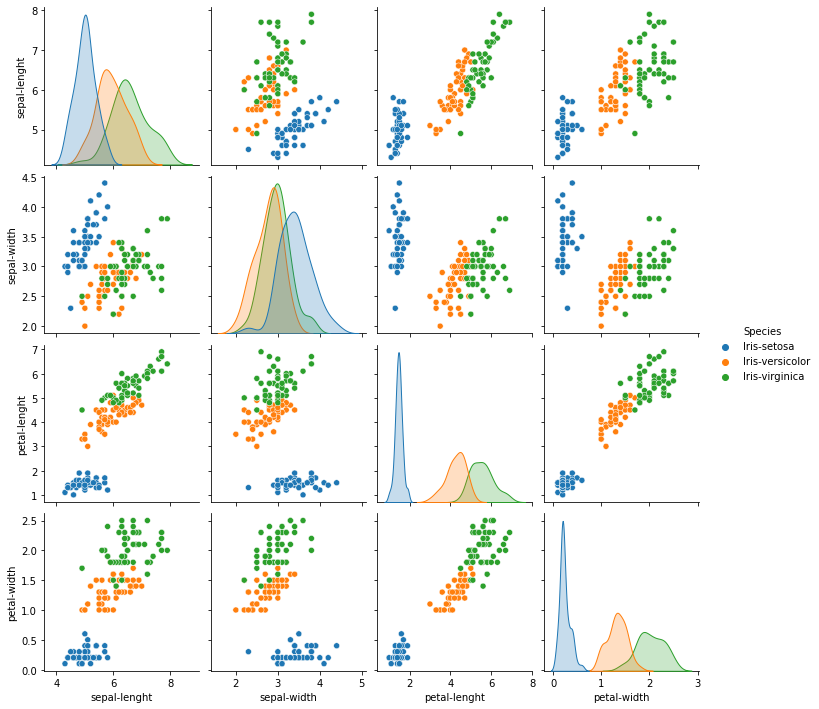

In [ ]:
sb.pairplot(data = iris, hue = 'Species')

### **3.2 Partición del dataset en entrenamiento y prueba**

Con el objetivo de crear un modelo capaz de generalizar se procede a dividir los datos en dos subconjuntos. El conjunto de **entrenamiento** y **prueba**.

* El algoritmo aprenderá a partir de los datos de **entrenamiento**.
* Los datos de prueba serán usados para evaluar el desempeño del modelo, ya que son datos desconocidos para el algoritmo.

Para el dataset Iris

| Variable | Uso|
| ----------- | ----------- |
| Largo del sépalo | Predictora |
| Ancho del sépalo | Predictora  |
| Largo del petalo | Predictora  |
| Ancho del petalo | Predictora  |
| Especie| Objetivo|


In [ ]:
# Primero dividiremos el conjunto en X - variables predictoras - / y - variable a predecir-

X = iris.iloc[:,0:4] # recuerde que en este caso la columna 4 no está siendo incluida
y = iris.iloc[:,4]

print('Dimensiones de X: {}'.format(X.shape))
print('Dimensiones de y: {}'.format(y.shape))

Dimensiones de X: (150, 4)
Dimensiones de y: (150,)


In [ ]:
# Ahora usaremos la función train test split que pertencen al paquete model_selection de sklearn

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y, #primero pasamos los datos
    test_size = 0.3, # Determinamos la porción de los datos que se usará para probar el modelo, en este caso 30% 
    random_state = 4  # 
)

In [ ]:
print('Dimensiones de X de entrenamiento: {}'.format(X_train.shape))
print('Dimensiones de y de entrenamiento: {}\n'.format(y_train.shape))

print('Dimensiones de X de prueba: {}'.format(X_test.shape))
print('Dimensiones de y de prueba: {}'.format(y_test.shape))

Dimensiones de X de entrenamiento: (105, 4)
Dimensiones de y de entrenamiento: (105,)

Dimensiones de X de prueba: (45, 4)
Dimensiones de y de prueba: (45,)


### **3.3 Modelamiento**

<p align="center">
<img src = "https://github.com/HarryVargas96/Wine-quality/blob/main/35afd114b390976d022c8821981789ea.png?raw=true" alt = "Regresión logística" width = "50%">  </img>

Vamos a crear un módelo de clasificación usando la regresión logística. Note que la regresión logística es un algoritmo para hacer clasificaciones y no regresiones como su nombre lo indica. La regresión logística permite predecir variables una variable que toma valores discretos en el rango entre 0 y 1. En el modelo de la izquierda se ajusta una linea recta al conjunto de datos. Esa recta sigue la ecuación.

$$ y = \beta_0 + \beta_1 x_1$$

Donde $\beta_0$ es el intercepto y $\beta_1$ es la pendiente de la recta.

Note que esta linea recta no es buen modelo para predecir la variable categórica y. En el modelo de la derecha se ajusta un curva logística que sigue la siguiente ecuación

$$ y = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1)}} $$

En este caso, el modelo intenta predecir la probabilidad de ocurrencia de 2 eventos de acuerdo a los valores que tome x, el mejor ajuste se consigue modificando los pesos $\beta_0$ y $\beta_1$.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Creamos un objeto que va a contener toda la información del modelo
logit = LogisticRegression(random_state = 4)

# Usando este objeto vamos a hacer el entrenamiento del modelo, para ello usamos el método fit, este se encarga de ajustar el modelo usando los datos de entrenamiento
logit.fit(X_train,y_train)



LogisticRegression(random_state=4)

### **3.4 Evaluación del desempeño del modelo**

Para evaluar el desempeño del módelo usaremos la exactitud tanto en la partición de entrenamiento como en la de prueba, recuerde que tomamos decisiones usando las métricas sobre la partición de prueba.

Para evaluar el desempeño vamos a comparar las etiquetas reales contra las etiquetas predichas por el modelo. Hagamos primero nuestra primera predicción usando el método predict sobre el objeto ``logit``.

In [ ]:
y_predict = logit.predict(X_test)
#Note que en este caso solo tengo que pasar a la función un subconjunto de X, el se encargará de generar el y_predict

In [ ]:
#Con el siguiente dataframe puede comparar los resultados obtenidos
comp = y_test == y_predict
comparison = pd.DataFrame( np.array([y_test,y_predict,comp]), index=['Etiqueta real','Etiqueta predicha','Comparación'])
comparison

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
Etiqueta real,Iris-virginica,Iris-setosa,Iris-virginica,Iris-virginica,Iris-virginica,Iris-versicolor,Iris-versicolor,Iris-setosa,Iris-setosa,Iris-virginica,Iris-setosa,Iris-setosa,Iris-setosa,Iris-versicolor,Iris-virginica,Iris-setosa,Iris-versicolor,Iris-setosa,Iris-setosa,Iris-virginica,Iris-setosa,Iris-virginica,Iris-versicolor,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-virginica,Iris-versicolor,Iris-setosa,Iris-virginica,Iris-setosa,Iris-versicolor,Iris-virginica,Iris-virginica,Iris-versicolor,Iris-versicolor,Iris-setosa,Iris-virginica,Iris-setosa,Iris-versicolor,Iris-setosa,Iris-virginica
Etiqueta predicha,Iris-virginica,Iris-setosa,Iris-virginica,Iris-virginica,Iris-virginica,Iris-versicolor,Iris-virginica,Iris-setosa,Iris-setosa,Iris-virginica,Iris-setosa,Iris-setosa,Iris-setosa,Iris-versicolor,Iris-virginica,Iris-setosa,Iris-versicolor,Iris-setosa,Iris-setosa,Iris-virginica,Iris-setosa,Iris-virginica,Iris-versicolor,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-virginica,Iris-versicolor,Iris-setosa,Iris-virginica,Iris-setosa,Iris-versicolor,Iris-virginica,Iris-virginica,Iris-versicolor,Iris-versicolor,Iris-setosa,Iris-virginica,Iris-setosa,Iris-versicolor,Iris-setosa,Iris-virginica
Comparación,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


#### **Exactitud - accuracy**

La exactitud se define como:

$$\text{Exactitud} = \frac{\text{número de ejemplos clasificados correctamente}}{\text{ número de ejemplos}}$$

Toma valores de 0 a y puede ser interpretado como el porcentaje de casos exitosamente clasificados por el modelo, entre mayor sea su valor mejor es el desempeño del modelo. Vamos a calcular la exactitud del modelo con la función accuracy_score que acepta como primer parámetro las etiquetas reales y como segundo parámetro las etiquetas predichas.

In [ ]:
from sklearn.metrics import accuracy_score

acc_knn = accuracy_score(y_test, y_predict)
print('Exactitud en partición de prueba: {:3f}'.format(acc_knn))

y_pred2 = logit.predict(X_train)
acc_knn2 = accuracy_score(y_train, y_pred2)
print('Exactitud en partición de entrenamiento: {:3f}'.format(acc_knn2))

Exactitud en partición de prueba: 0.977778
Exactitud en partición de entrenamiento: 0.980952


In [ ]:
# Otra forma para calcular la exactitud del conjunto de prueba y entrenamiento
# Para modelos de clasificación score es exactitud

logit.score(X_test,y_test)

0.9777777777777777

Como puede observar se obtuvo una exactitud del 98.1% en el conjunto de entrenamiento. Mientras que en el conjunto de prueba disminuyó un poco hasta 97.8%


In [ ]:
# Coeficientes - pesos 

logit.coef_

array([[-0.4405076 ,  0.83878018, -2.30573041, -0.96515184],
       [ 0.59196319, -0.28452944, -0.21684031, -0.89752147],
       [-0.1514556 , -0.55425073,  2.52257072,  1.86267331]])

In [ ]:
# Intercepto 

logit.intercept_

array([  9.29388676,   1.63298497, -10.92687173])

# **4. Regresión lineal - Diamonds**

El dataset diamond tiene 53940 observaciones y 10 variables. La variable objetivo es el precio del diamante. El dataset tiene 3 variables cualitativas ordinales: cut, color y clarity. Que se listan a continuación, para más información de click [aquí](https://www.kaggle.com/shivam2503/diamonds).

<p align="center">
  <img src = "https://raw.githubusercontent.com/HarryVargas96/Wine-quality/main/diamond-depth-and-table.webp" alt = "Diamante" width = "50%">  </img>

| Variable | Descripción|
| ----------- | ----------- |
| carat | Peso en quilates |
| cut | Calificación de la talla (Fair, Good, Very Good, Premium, Ideal)|
| color | Escala de color desde D (mejor) a J (peor) |
| clarity | Medida de la claridad del diamante  |
|x|longitud en mm|
|y|ancho en mm|
|z|profundidad en mm|
| depth| Porcentaje profundidad total |
|table|Ancho de la parte más alta del diamante relativo al punto más ancho|
|price|precio del diamante en dólares estadounidenses|

**Notas**

* Un quilate equivale a 0.2 gramos.

* Los diamantes color D son los más traslucidos y raros.

* La escala de claridad es la siguiente, mide la cantidad de inclusiones que afectan la claridad de los diamantes. La escala IF es para los diamantes con mejor claridad.

> * IF: Internally Flawless
* VVS: Very Very Sligthly Included
* VS: Very Sligthly Included
* SI: Sligthly Included
* I: Included

$$ depth-percentaje = \frac{z}{mean(x,y)} $$






### **4.1 Exploración**

In [ ]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
#Revisión de valores nulos

diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
diamonds.describe() # Resumen estadístico de las variables numéricas, note que a partir de x,y y z se calcula el porcentaje depth

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


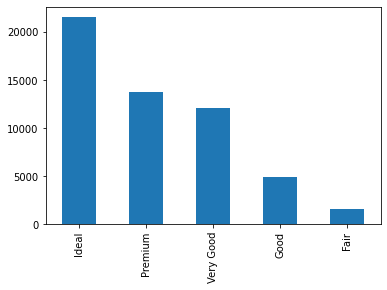

In [ ]:
#Distribución por calidad de talla
diamonds['cut'].value_counts().plot(kind = 'bar')

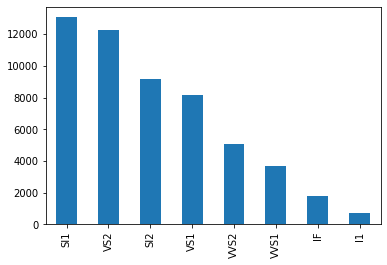

In [ ]:
#Distribución por claridad
diamonds['clarity'].value_counts().plot(kind = 'bar')

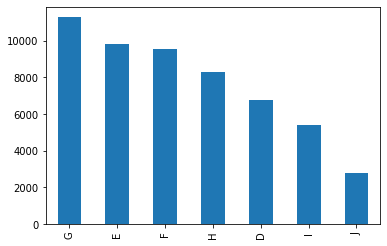

In [ ]:
#Distribución por color
diamonds['color'].value_counts().plot(kind = 'bar')

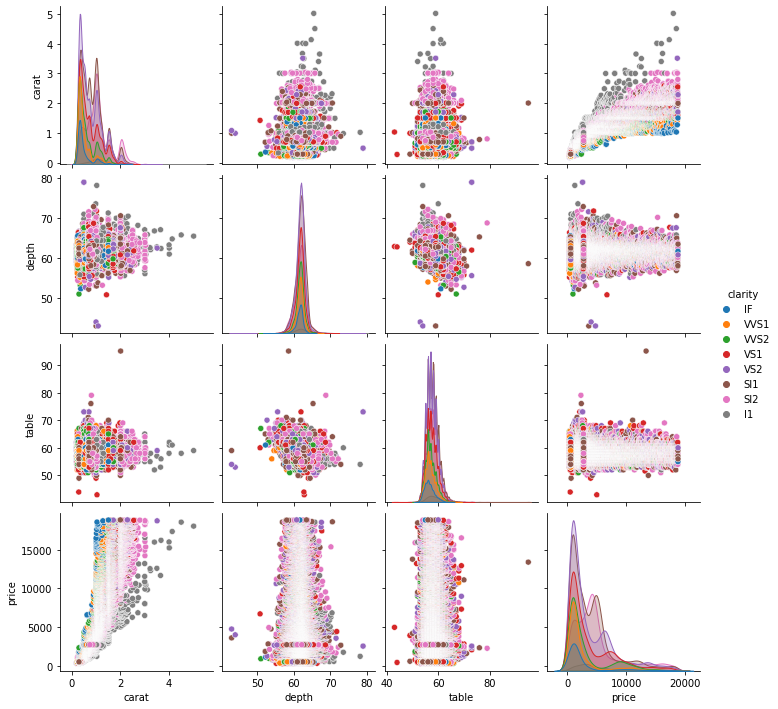

In [ ]:
# En hue puede intercambiar por color, clarity, cut. Cualquier variable categórica.
# Esta visualización es pesada, puede tardar un par de minutos en aparecer al ejecutar

sb.pairplot(data = diamonds.iloc[:,0:7], hue = 'clarity') 

### **4.2. Transformación de variables**

Para el caso del dataset diamonds se deben transformar las variables categóricas a variables dummy. Recuerde que hay 3 variables categóricas en el dataset, color, clarity and cut.

In [ ]:
# Filtramos el dataset diamonds y quitamos las variables x, y z
# Se convierten en dummies las variables categóricas
# Cut (5) + color (7) + clarity(8) + Numéricas(4) = 24 variables

diamonds_transf = pd.get_dummies(diamonds.iloc[:,0:7])
diamonds_transf.head()
# diamonds_transf.shape

,carat,depth,table,price,cut_Ideal,cut_Premium,cut_Very Good,cut_Good,cut_Fair,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,61.5,55.0,326,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0.21,59.8,61.0,326,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.23,56.9,65.0,327,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0.29,62.4,58.0,334,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,0.31,63.3,58.0,335,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


### **4.3 Partición del dataset en entrenamiento y prueba**


Para el dataset diamond

| Variable | Uso |
| ----------- | ----------- |
| carat | Predictora |
| cut | Predictora|
| color |Predictora |
| clarity | Predictora  |
| depth| Predictora |
|table|Predictora|
|price|Objetivo|

In [ ]:
# Se divide entre variables predictoras y objetivo
# Quitamos la variable precio para obtener el conjunto de variables predictoras

X = diamonds_transf.drop('price', axis = 1).values

y = diamonds_transf['price'].values

print('Dimensiones de X: {}'.format(X.shape))
print('Dimensiones de y: {}'.format(y.shape))

Dimensiones de X: (53940, 23)
Dimensiones de y: (53940,)


In [ ]:
lenght(y)

NameError: ignored

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y, #primero pasamos los datos
    test_size = 0.3, # Determinamos la porción de los datos que se usará para probar el modelo, en este caso 30% 
    random_state = 4  # Semilla aleatoria que sirve para reproducibilidad
)

In [ ]:
print('Dimensiones de X de entrenamiento: {}'.format(X_train.shape))
print('Dimensiones de y de entrenamiento: {}\n'.format(y_train.shape))

print('Dimensiones de X de prueba: {}'.format(X_test.shape))
print('Dimensiones de y de prueba: {}'.format(y_test.shape))

Dimensiones de X de entrenamiento: (37758, 23)
Dimensiones de y de entrenamiento: (37758,)

Dimensiones de X de prueba: (16182, 23)
Dimensiones de y de prueba: (16182,)


### **4.4 Modelamiento**

Para este caso, usaremos la regresión lineal para predecir una variable numérica continua -el precio-.

In [ ]:
from sklearn.linear_model import LinearRegression # Importar el algoritmo de regresión lineal

# Crear un objeto que va guardar la información del modelo
lr = LinearRegression()

# Ajustar el modelo con los datos de entrenamiento - aprendizaje
lr.fit(X_train,y_train)

LinearRegression()

### **4.5 Evaluación del desempeño del modelo**

#### Coeficiente de determinación $R^{2}$

El coeficiente de determinación representa la proporción de la varianza de y que ha sido explicado por las variables independientes del modelo. Provee una indicación de que tan bueno fue el ajuste además de indicar que tan bueno será el desempeño de las predicciones con nuevos datos. El mejor valor posible es 1, en el peor de los casos un modelo constante que siempre predice el mismo valor sin imporar el valor de x tendría un score de 0.

$$R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

Donde $y_i$ es el valor real para la i-ésima observación. $\hat{y}_i$ es el valor predicho por el módelo para i-ésima observación y $\bar{y}$ es el promedio de los valores observados para y.

In [ ]:
# Realizamos predicciones usando el modelo lr que hemos entrenado

y_predict = lr.predict(X_test)
y_pred2 = lr.predict(X_train)

In [ ]:
# Evaluación del desempeño del modelo con R^2

from sklearn.metrics import r2_score

r2_prueba = r2_score(y_test, y_predict)
print('Exactitud en partición de prueba: {:3f}'.format(r2_prueba))


r2_entren = r2_score(y_train, y_pred2)
print('Exactitud en partición de entrenamiento: {:3f}'.format(r2_entren))

# Para modelos de clasificación score es el coeficiente de determinación R^2

print('\nOtra forma de calcular el R2: {}'.format(lr.score(X_test,y_test)))

Exactitud en partición de prueba: 0.916358
Exactitud en partición de entrenamiento: 0.915897

Otra forma de calcular el R2: 0.9163575047281929


In [ ]:
y_test

48479    1979
30207     723
6934     4140
52520    2528
8034     4334
         ... 
41378    1221
33193     819
43399    1412
3232     3353
6769     4108
Name: price, Length: 16182, dtype: int64

In [ ]:
y_test.to_csv('test.csv')
pd.DataFrame(y_predict).to_csv('predict.csv')

y_train.to_csv('train.csv')
pd.DataFrame(y_pred2).to_csv('pred_train.csv')

Para ambos conjuntos se obtuvó que el 92% de la varianza de y es explicada por las variables predictoras. ¿Este es un buen desempeño? Discutalo en el foro con sus compañeros.

In [ ]:
# Arreglo de coeficientes (pendiente) para cada variable
lr.coef_

array([ 8.90398284e+03, -2.13263040e+01, -2.94118376e+01,  2.53086686e+02,
        1.96364884e+02,  1.58149130e+02,  1.13366810e+00, -6.08734367e+02,
        8.34371562e+02,  6.15154717e+02,  5.19773283e+02,  3.19966102e+02,
       -1.60831515e+02, -6.20855813e+02, -1.50757834e+03,  1.64841660e+03,
        1.26844515e+03,  1.15427247e+03,  7.45377973e+02,  4.24580133e+02,
       -2.11110491e+02, -1.15474978e+03, -3.87523205e+03])

In [ ]:
# Intercepto

lr.intercept_

-695.965345304005

## **Recursos adicionales**


* Regresión logística

https://christophm.github.io/interpretable-ml-book/logistic.html

* Documentación regresión logística

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

* Regresión lineal

https://christophm.github.io/interpretable-ml-book/limo.html

* Documentación regresión lineal

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

## **Créditos**
---

**Profesor:** Harry Vargas Rodríguez

**Corporación Universitaria de Cataluña** - *Diplomado en Big Data y Data Science*